<a href="https://colab.research.google.com/github/kavikushi0228/Image-processing-assignment-2/blob/main/IP_AS2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("medical.jpg", cv2.IMREAD_GRAYSCALE)

# Define the seed points (you can choose them manually or programmatically)
seed_points = [(100, 100), (200, 200), (300, 150)]

# Define the range of pixel values for the region-growing
pixel_range = 20

# Create a mask for the segmented region
mask = np.zeros_like(img)

# Define a queue to hold the pixel coordinates to be processed
queue = []

# Add the seed points to the queue and set the corresponding pixels in the mask to 255
for seed in seed_points:
    # Check if the seed point is within the image boundaries
    if seed[0] >= 0 and seed[0] < img.shape[0] and seed[1] >= 0 and seed[1] < img.shape[1]:
        queue.append(seed)
        mask[seed] = 255

# Process the pixels in the queue
while len(queue) > 0:
    # Pop the next pixel from the queue
    pixel = queue.pop(0)
    
    # Get the neighboring pixels (8-connected)
    neighbors = [(pixel[0]-1, pixel[1]-1), (pixel[0]-1, pixel[1]), (pixel[0]-1, pixel[1]+1),
                 (pixel[0], pixel[1]-1), (pixel[0], pixel[1]+1),
                 (pixel[0]+1, pixel[1]-1), (pixel[0]+1, pixel[1]), (pixel[0]+1, pixel[1]+1)]
    
    # Process the neighboring pixels
    for neighbor in neighbors:
        # Check if the neighbor is within the image boundaries
        if neighbor[0] >= 0 and neighbor[0] < img.shape[0] and neighbor[1] >= 0 and neighbor[1] < img.shape[1]:
            # Check if the neighbor has not been processed yet
            if mask[neighbor] == 0:
                # Check if the neighbor's pixel value is within the range of the seed pixel values
                if abs(int(img[pixel]) - int(img[neighbor])) <= pixel_range:
                    # Add the neighbor to the queue and set the corresponding pixel in the mask to 255
                    queue.append(neighbor)
                    mask[neighbor] = 255

# Save the segmented region as a binary image
cv2.imwrite("segmented_region.jpg", mask)


True

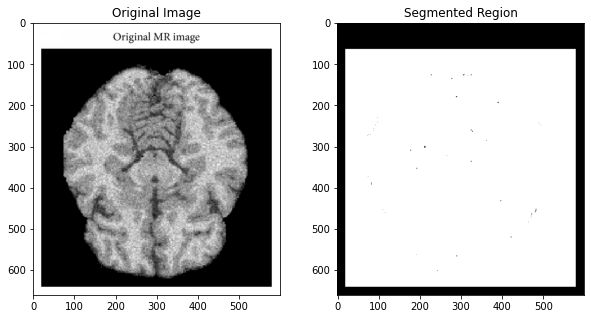

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread("medical.jpg")

# Load the segmented region image
mask = cv2.imread("segmented_region.jpg", cv2.IMREAD_GRAYSCALE)

# Create a side-by-side comparison plot
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Segmented Region")

# Show the plot
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('input_image.png')

# Define the seed points for region-growing
seed_points = [(100, 100), (200, 200), (300, 300)]

# Define the range of pixel values for the region-growing
pixel_range = 20

# Initialize an empty mask for the segmented image
seg_mask = np.zeros_like(img[:,:,0])

# Define a function for region-growing
def region_grow(img, seed_points, pixel_range, seg_mask):
    # Define the connectivity of neighboring pixels
    connectivity = 8
    
    # Define a queue to store the neighboring pixels
    queue = []

    # Iterate through each seed point
    for seed_point in seed_points:
        # Add the seed point to the queue
        queue.append(seed_point)

        # Define the pixel value range for the seed point
        pixel_range_min = img[seed_point[0], seed_point[1]] - pixel_range
        pixel_range_max = img[seed_point[0], seed_point[1]] + pixel_range

        # Loop until the queue is empty
        while len(queue) > 0:
            # Pop the next pixel from the queue
            pixel = queue.pop(0)

            # Check if the pixel is already labeled in the mask
            if seg_mask[pixel[0], pixel[1]] == 0:
                # Check if the pixel value is within the range
                if np.all(img[pixel[0], pixel[1]] >= pixel_range_min) and np.all(img[pixel[0], pixel[1]] <= pixel_range_max):
                    # Label the pixel in the mask
                    seg_mask[pixel[0], pixel[1]] = 255

                    # Add the neighboring pixels to the queue
                    neighbors = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
                    neighbors = np.transpose(np.nonzero(neighbors))
                    neighbors = neighbors - [1, 1] + pixel
                    neighbors = neighbors[(neighbors[:,0] >= 0) & (neighbors[:,1] >= 0) & (neighbors[:,0] < img.shape[0]) & (neighbors[:,1] < img.shape[1])]
                    for neighbor in neighbors:
                        queue.append(neighbor.tolist())

# Perform region-growing on the image
region_grow(img, seed_points, pixel_range, seg_mask)

# Display the original image and the segmented image side by side
vis = np.concatenate((img, cv2.cvtColor(seg_mask, cv2.COLOR_GRAY2BGR)), axis=1)
vis = cv2.putText(vis, 'Original Image', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
vis = cv2.putText(vis, 'Original Image', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('m.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a binary mask for the segmented region
mask = np.zeros_like(gray)

# Define the seed point (you can choose any point inside the object of interest)
seed_point = (100, 100)

# Define the threshold range for the region-growing algorithm
threshold_range = (50, 200)

# Define the connectivity for the region-growing algorithm
connectivity = 8

# Define a function for region-growing algorithm
def region_grow(img, mask, seed_point, threshold_range, connectivity):
    # Initialize the queue with the seed point
    queue = [seed_point]

    # Loop over the queue until it is empty
    while len(queue) > 0:
        # Pop the first point from the queue
        current_point = queue.pop(0)

        # Check if the current point is within the threshold range
        if (img[current_point] >= threshold_range[0]) and (img[current_point] <= threshold_range[1]):
            # Set the current point in the mask to 1 (foreground)
            mask[current_point] = 1

            # Get the neighboring points
            neighbors = cv2.getNeighborhoodIndices(img.shape, connectivity, current_point[0], current_point[1])[0]

            # Loop over the neighboring points
            for neighbor in neighbors:
                # Check if the neighbor is within the image bounds and is not already in the mask
                if (neighbor[0] >= 0) and (neighbor[0] < img.shape[0]) and (neighbor[1] >= 0) and (neighbor[1] < img.shape[1]) and (mask[neighbor] == 0):
                    # Add the neighbor to the queue
                    queue.append(neighbor)

    # Return the segmented mask
    return mask

# Call the region-growing function with the input parameters
segmented_mask = region_grow(gray, mask, seed_point, threshold_range, connectivity)

# Convert the segmented mask to a color image for visualization
segmented = cv2.cvtColor(segmented_mask * 255, cv2.COLOR_GRAY2BGR)

# Overlay the segmented image on the original image with a red color
segmented[segmented_mask > 0] = (0, 0, 255)
result = cv2.addWeighted(img, 0.5, segmented, 0.5, 0)

# concatenate the original and segmented images horizontally
display_img = np.concatenate((img, result), axis=1)

# display the concatenated image
cv2_imshow(display_img)

cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# read the input image
img = cv2.imread('medical.jpg', cv2.IMREAD_GRAYSCALE)

# set the seed point as the center of the image
seed_point = (img.shape[0]//2, img.shape[1]//2)

# define the threshold range for pixel values to be included in the segmentation
threshold_range = (img[seed_point] - 20, img[seed_point] + 20)

# create a binary mask for the segmented region
mask = np.zeros_like(img, dtype=np.uint8)

# set the seed point as the initial pixel to be added to the segmented region
mask[seed_point] = 255

# perform region growing until all connected pixels within the threshold range have been added to the mask
while True:
    # get the coordinates of all pixels in the mask that are currently set to 255
    coords = np.column_stack(np.where(mask == 255))
    
    # stop the loop if there are no more 255 pixels in the mask
    if len(coords) == 0:
        break
    
    # loop through the 8-connected neighbors of each 255 pixel in the mask
    for c in coords:
        for i in range(-1, 2):
            for j in range(-1, 2):
                # skip the current pixel and out-of-bounds pixels
                if (i == 0 and j == 0) or (c[0]+i < 0) or (c[1]+j < 0) or (c[0]+i >= img.shape[0]) or (c[1]+j >= img.shape[1]):
                    continue
                
                # add the neighboring pixel to the mask if it has a value within the threshold range and is not already in the mask
                if (img[c[0]+i, c[1]+j] >= threshold_range[0]) and (img[c[0]+i, c[1]+j] <= threshold_range[1]) and (mask[c[0]+i, c[1]+j] == 0):
                    mask[c[0]+i, c[1]+j] = 255

# display the segmented region in green on the input image
result = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
result[np.where(mask == 255)] = [0, 255, 0]
cv2.imshow('Segmented Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


KeyboardInterrupt: ignored